In [1]:
# default_exp core

# Core functions
> Some useful functions

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from nbdev.showdoc import *

In [4]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [5]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[ 0.7892, -2.9258, -1.1625,  1.1474, -0.4850],
        [ 0.7976, -0.5461,  0.2574,  0.5411, -0.6740],
        [ 0.9968, -0.2342,  1.3785,  0.0139, -0.9971],
        [-0.7576, -0.0048,  0.6593, -0.9135,  0.2295],
        [-0.4795, -0.2331, -0.9916, -1.0605, -0.2094]])

In [6]:
stats(t)

(tensor(-0.0315), tensor(0.9905))

### Cross Entropy Loss

Softmax of our activations is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

where $n$ is the number of classes.

In practice, we will need the log of the softmax when we calculate the loss.

In [7]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [8]:
log_softmax(t)

tensor([[-3.4049, -7.1199, -5.3566,  ..., -3.6529, -4.6781, -6.3898],
        [-3.7084, -5.0522, -4.2487,  ..., -4.9261, -4.8588, -5.1855],
        [-3.1053, -4.3363, -2.7237,  ..., -3.2409, -3.8995, -3.7686],
        ...,
        [-5.8884, -5.2136, -4.3833,  ..., -5.1274, -3.5619, -5.7524],
        [-5.8729, -3.1076, -6.3868,  ..., -5.3215, -4.1654, -4.3532],
        [-3.0135, -5.1343, -5.3815,  ..., -5.4488, -6.4116, -4.3251]])

In [9]:
def accuracy(pred,y):
    ""
    return (pred.argmax(dim=1) == y).float().mean()

In [10]:
def error(pred,y):
    return 1-accuracy(pred,y)

In [11]:
#export
def plotdist(x):
    "Plot distribution `x`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

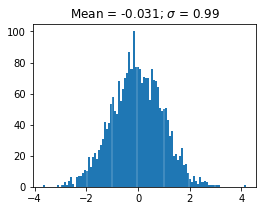

In [12]:
plotdist(t)

In [13]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
